# Forest Cover Classification

In this project I have built classifier using deep learinng to predict the forest cover type based on cartographic variables within provided data set. The data contains variables derived from data obtained from the US Geological Survey and USFS (United States Forest Service). These variables include qualitative variables sush as wilderness areas and soil type.

> Setup

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import tensorflow as tf
from tensorflow import keras


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

* Reading data, extracting featueres and labels. This data set contains 54 columns. All of them are numerical, so there is no need to do one-hot encoding. Last column (class) is my label, so each number {1, 2,... 7} corresponds to 7 forest types, which I want to predict. Other 53 columns are used as features.

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [2]:
data = pd.read_csv('/kaggle/input/cover-data/cover_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.groupby('class').describe()

Elevation                                                            \
          count         mean         std     min      25%     50%     75%   
class                                                                       
1      211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0  3235.0   
2      283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0  3042.0   
3       35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0  2549.0   
4        2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0  2304.0   
5        9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0  2857.0   
6       17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0  2544.0   
7       20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0  3409.0   

                 Aspect              ... Soil_Type39      Soil_Type40  \
          max     count        mean  ...         75%  max       count   
class                                ...                                
1      3686.0  211840.0  156.138227  ...         0.0  1.0    211840.0   
2      3433.0  283301.0  152.060515  ...         0.0  1.0    283301.0   
3      2899.0   35754.0  176.372490  ...         0.0  0.0     35754.0   
4      2526.0    2747.0  137.139425  ...         0.0  0.0      2747.0   
5      3011.0    9493.0  139.283051  ...         0.0  0.0      9493.0   
6      2900.0   17367.0  180.539068  ...         0.0  0.0     17367.0   
7      3858.0   20510.0  153.236226  ...         1.0  1.0     20510.0   

                                                    
           mean       std  min  25%  50%  75%  max  
class                                               
1      0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2      0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7      0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [6]:
features = data.iloc[:, 0: -1]
features.head(10)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,0


* There is a class imbalance between the classes, so the stratify argument is used in *train_test_split()*

In [7]:
label = data.iloc[:, -1]
label.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [8]:
label = np.array(label - 1)

In [9]:
print(label)
print(np.unique(label))

[4 4 1 ... 2 2 2]
[0 1 2 3 4 5 6]


In [10]:
label = keras.utils.to_categorical(label, num_classes=7)

In [11]:
print(label)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


* Splitting for test and train set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state=22, stratify=label)

* Scalling the features test data. As we can see in the individual columns, there are significant differences in the scale of the data.

In [13]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [14]:
print(X_train_scale.shape)
print(X_test_scale.shape)

print(y_train.shape)
print(y_test.shape)


(464809, 54)
(116203, 54)
(464809, 7)
(116203, 7)


In [15]:
print(np.unique(y_train))
print(np.unique(y_test))

[0. 1.]
[0. 1.]


* Building model, compile, fit and checking the performance

In [20]:
def build_model(train_data, val_data, train_label, val_label, learning_rate = 0.001):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=train_data.shape[1]),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(rate=0.1),
        keras.layers.Dense(units=32, activation='relu'),
        keras.layers.Dense(units=7, activation='softmax')
    ])

    model.summary()



    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
    )

    history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=100, batch_size=32, callbacks=[early_stopping])

    score = model.evaluate(X_test_scale, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return model, history

* Function to easliy plot the performance

In [17]:
def plot_history(history, param):

    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

* Checking prediction stats on validation data

In [21]:
model, history = build_model(X_train_scale, X_test_scale, y_train, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3520      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 5,831
Trainable params: 5,831
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14526/14526 [==============================] - 52s 3ms/step - loss: 0.5839 - accuracy: 0.7507 - val_loss: 0.4992 - val_accuracy: 0.7897
Epoch 2/100
14526/14526 [===========

In [27]:
model.save('./model.h5')

In [28]:
final_model = keras.models.load_model('./model.h5')
final_model.evaluate(X_test_scale, y_test)

3632/3632 [==============================] - 9s 2ms/step - loss: 0.3309 - accuracy: 0.8652


[0.3309181332588196, 0.865227222442627]

Testing classification through ***classification_report*** function. Metrics seems preety well.

In [51]:
y_test_arg = np.argmax(y_test, axis=1)
y_pred = np.argmax(final_model.predict(X_test_scale), axis=1)


class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test_arg, y_pred, target_names=class_names))

3632/3632 [==============================] - 5s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.86      0.85      0.86     42368
   Lodgepole Pine       0.88      0.90      0.89     56661
   Ponderosa Pine       0.85      0.86      0.86      7151
Cottonwood/Willow       0.80      0.70      0.74       549
            Aspen       0.78      0.49      0.60      1899
      Douglas-fir       0.74      0.74      0.74      3473
        Krummholz       0.90      0.86      0.88      4102

         accuracy                           0.87    116203
        macro avg       0.83      0.77      0.80    116203
     weighted avg       0.86      0.87      0.86    116203



Lastly, plotting training process.

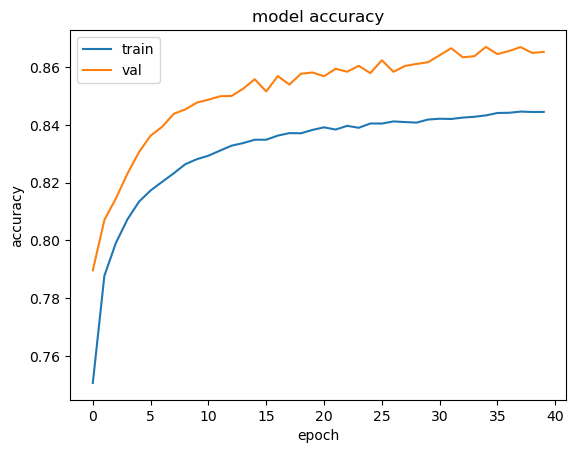

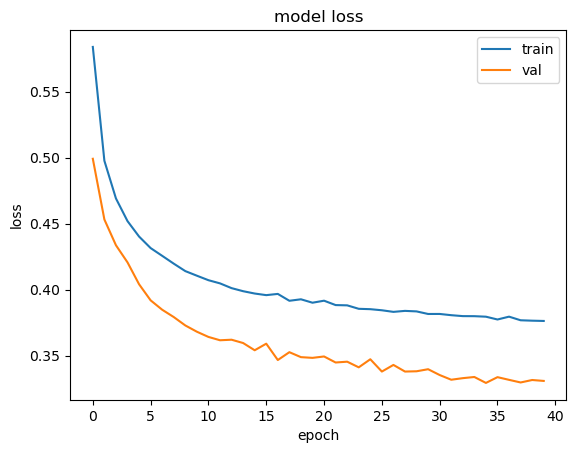

In [24]:
plot_history(history, 'acc')
plot_history(history, 'loss')